### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008000">IRIS_SPECIES_ASSESMENT

In [1]:
#Load Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import scale
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
dataframe = pd.read_csv('iris.csv')

In [3]:
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataframe.shape

(150, 5)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###### Missing values

In [6]:
# To check any Null values in the dataset
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Check Duplicated Data

In [7]:
# finding dupicate data and getting total number of duplicated data
dataframe.duplicated().sum()

3

### EDA

In [8]:
dataframe.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Covariance and Correlation

In [9]:
dataframe.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [10]:
dataframe.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [11]:
dataframe['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

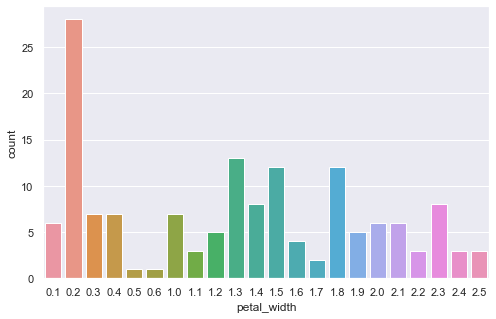

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='petal_width', data=dataframe)

In [13]:
dataframe.groupby(['species', 'petal_width']).size().unstack(fill_value=0)

petal_width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,6,28,7,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Iris-versicolor,0,0,0,0,0,0,7,3,5,13,...,3,1,1,0,0,0,0,0,0,0
Iris-virginica,0,0,0,0,0,0,0,0,0,0,...,1,1,11,5,6,6,3,8,3,3


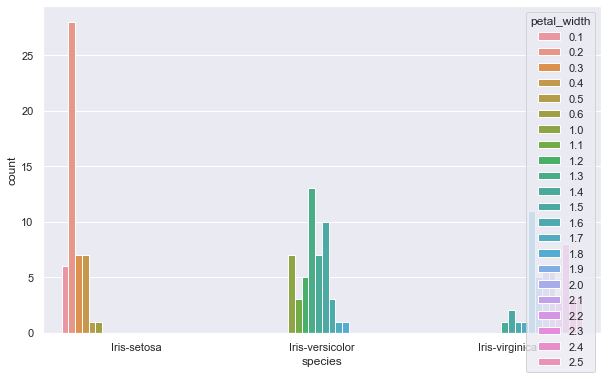

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='species', hue='petal_width', data=dataframe)

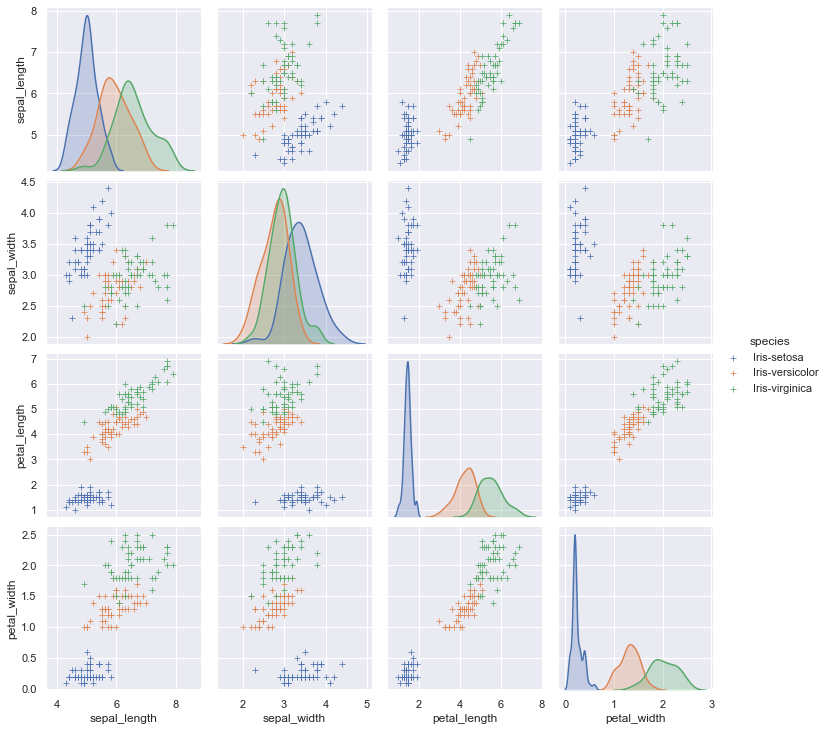

In [15]:
sns.pairplot(dataframe, hue='species', markers='+')
plt.show()

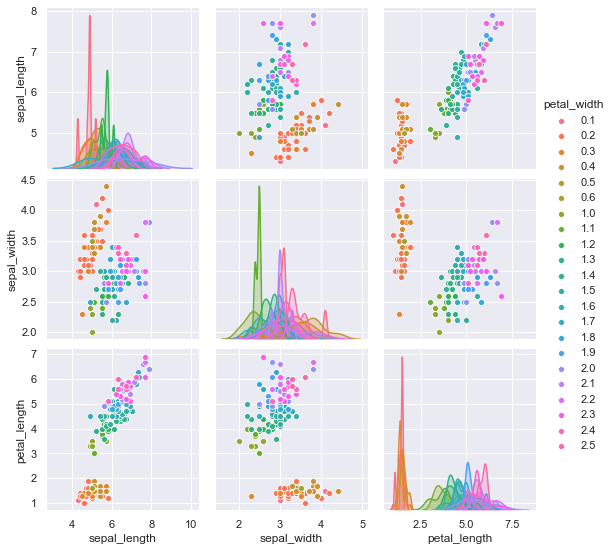

In [16]:
sns.pairplot(dataframe, hue='petal_width')
plt.show()

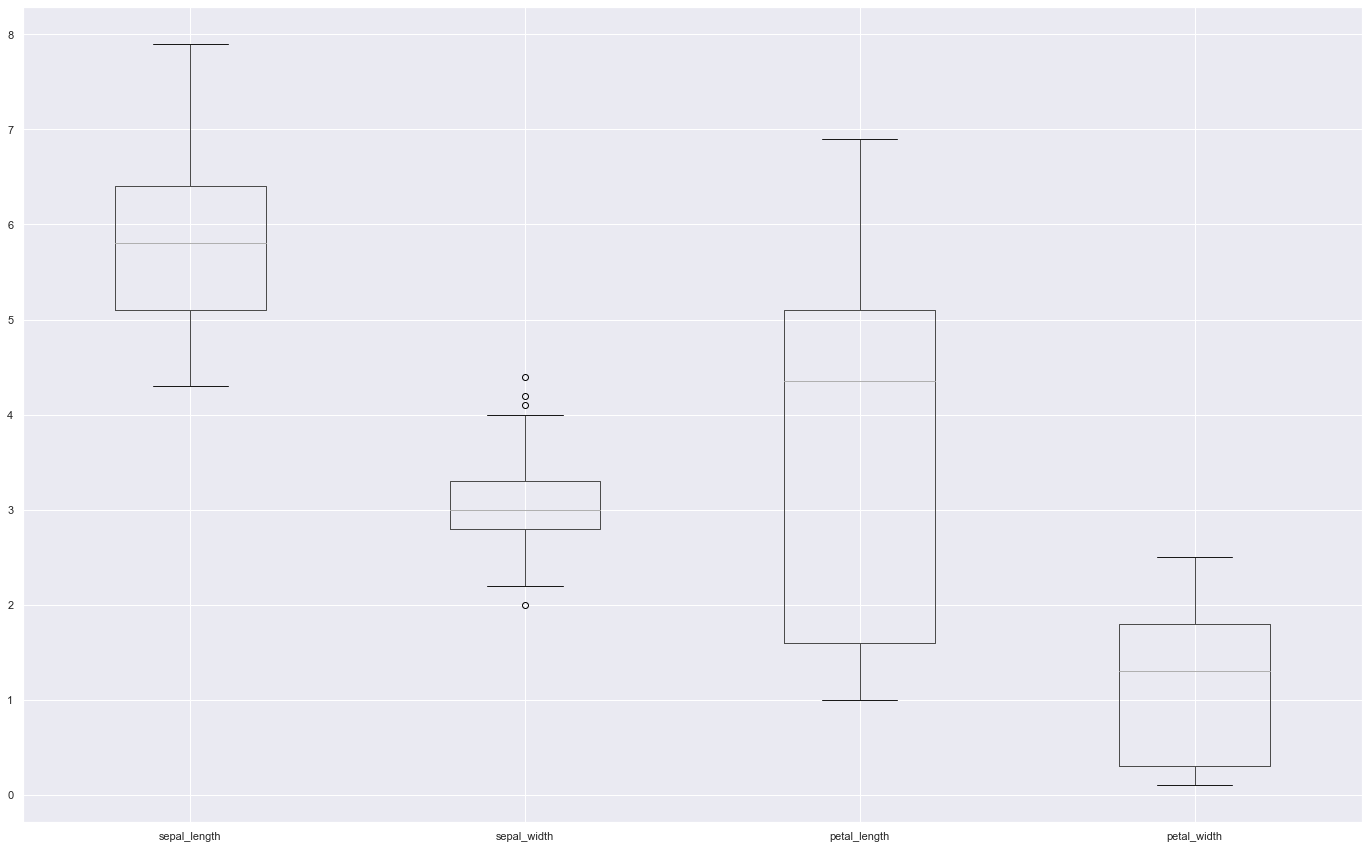

In [17]:
dataframe.boxplot(figsize=(24,15))

##### Measure of skewness 

Skewness: -0.104997


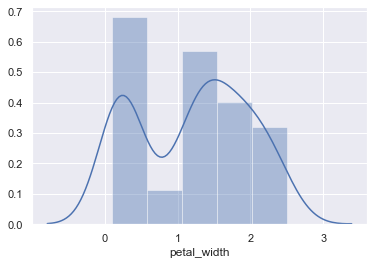

In [18]:
# Skewness of  'petal_width' varibale  
sns.distplot(dataframe['petal_width'])
plt.show
print("Skewness: %f" % dataframe['petal_width'].skew())

Skewness: -0.274464


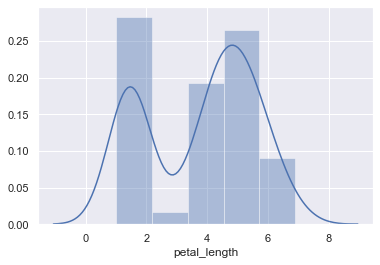

In [19]:
# Skewness of  'petal_length' varibale  
sns.distplot(dataframe['petal_length'])
plt.show
print("Skewness: %f" % dataframe['petal_length'].skew())

Skewness: 0.334053


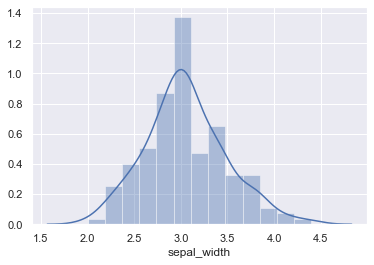

In [20]:
# Skewness of  'sepal_width' varibale  
sns.distplot(dataframe['sepal_width'])
plt.show
print("Skewness: %f" % dataframe['sepal_width'].skew())

Skewness: 0.314911


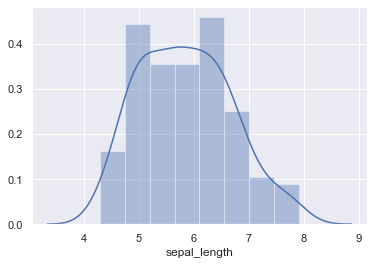

In [21]:
# Skewness of  'sepal_length' varibale  
sns.distplot(dataframe['sepal_length'])
plt.show
print("Skewness: %f" % dataframe['sepal_length'].skew())

Plotting for column sepal_length


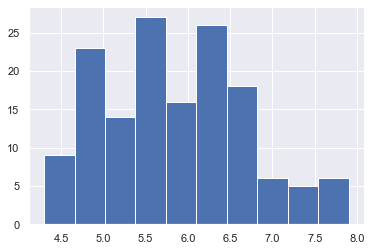

Plotting for column sepal_width


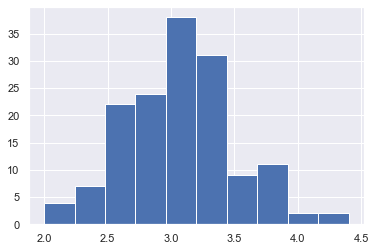

Plotting for column petal_length


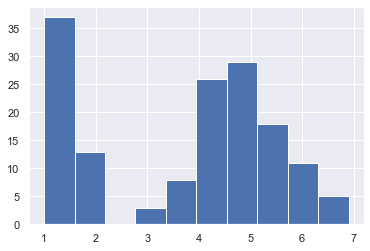

Plotting for column petal_width


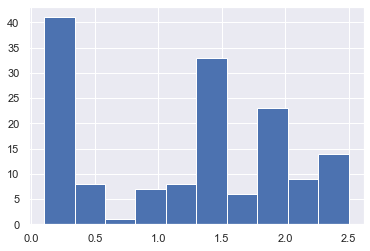

Plotting for column species


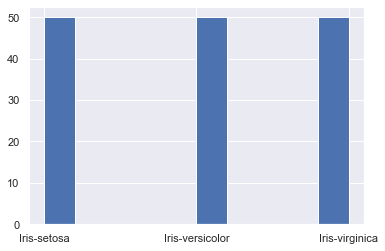

In [22]:
for col in dataframe.columns:
    hist = dataframe[col].hist()
    print("Plotting for column {}".format(col))
    plt.show()

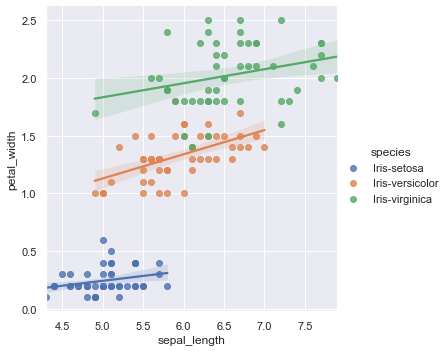

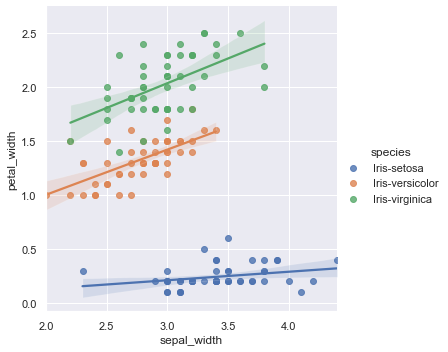

In [23]:
for col in dataframe.columns[:-3]:
    sns.lmplot(data=dataframe, x=col, y='petal_width', hue='species')

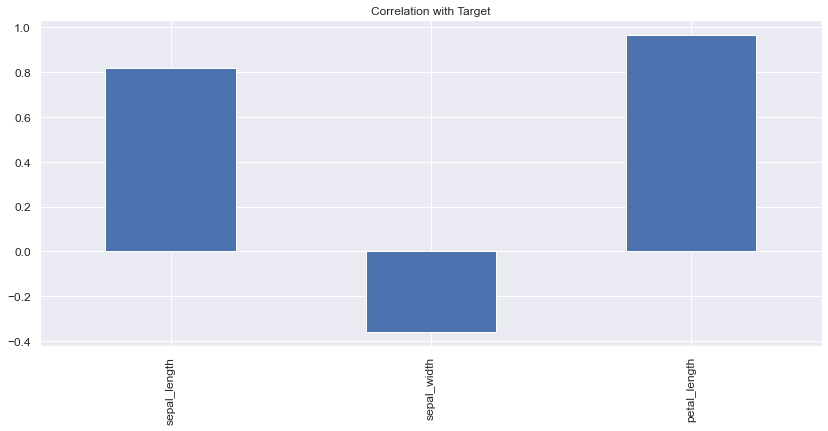

In [24]:
# Correlation with Target
predictors = dataframe.drop('petal_width', axis=1)
predictors.corrwith(dataframe['petal_width']).plot.bar(figsize=(14, 6), title="Correlation with Target", fontsize=12, grid=True)

(4.5, -0.5)

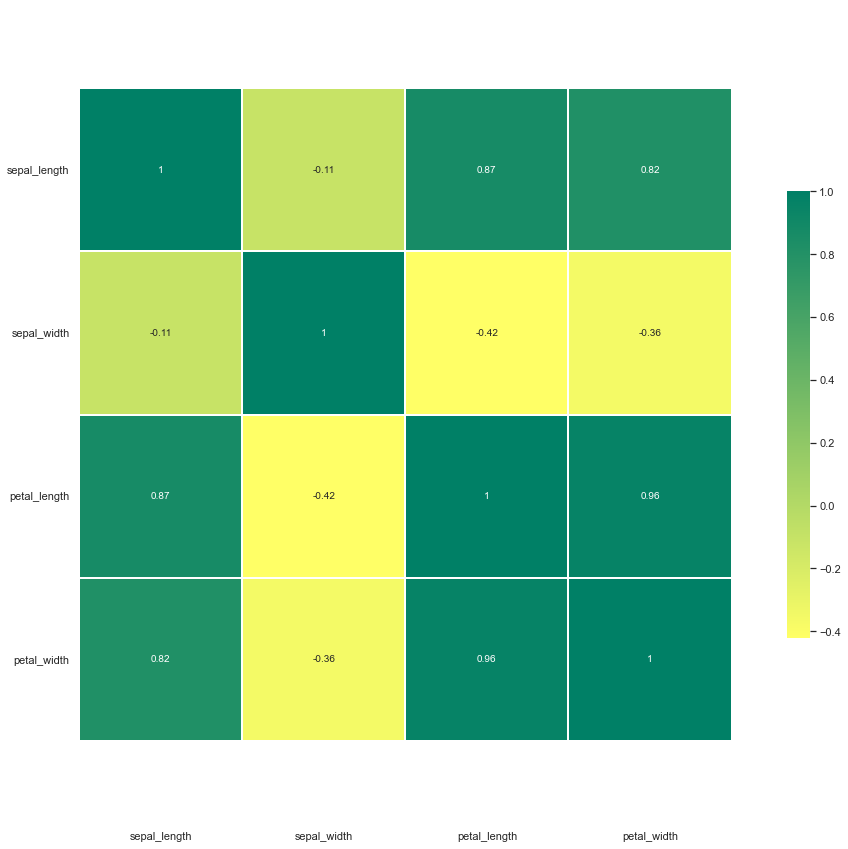

In [25]:
# Create correlation matrix
corr_matrix = dataframe.corr()
plt.figure(figsize=(20, 15))
sns.set_style(style='white')
g = sns.heatmap(data=corr_matrix, annot=True, cmap='summer_r',
                square=True, linewidth=1, cbar_kws={'fraction': 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
#read json file
import json
algo_data = pd.read_json("algoparams_from_ui.json")

In [27]:
Target = algo_data['design_state_data']['target']
Models = algo_data['design_state_data']['algorithms']

In [28]:
Target

{'prediction_type': 'Regression',
 'target': 'petal_width',
 'type': 'regression',
 'partitioning': True}

In [29]:
Models

{'RandomForestClassifier': {'model_name': 'Random Forest Classifier',
  'is_selected': False,
  'min_trees': 10,
  'max_trees': 30,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 30,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 50,
  'parallelism': 0},
 'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': True,
  'min_trees': 10,
  'max_trees': 20,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 25,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 10,
  'parallelism': 0},
 'GBTClassifier': {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'learningRate': [],
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_i

In [30]:
# One Hot Encoding on Dataset
dataframe = pd.get_dummies(dataframe,columns=['species'],drop_first = True)

### Model Building

In [31]:
X = dataframe.drop(columns = ['petal_width'],axis = 1)
Y = dataframe.petal_width

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

##### Model_Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor(n_estimators = 20 ,max_depth = 20 , min_samples_leaf = 10)
rf_r.fit(X_train,Y_train)
print('Random Forest Regression Training Accuracy:', rf_r.score(X_train, Y_train))   

Random Forest Regression Training Accuracy: 0.9513272343529122


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
pred = rf_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of Random Forest Regressor : {mse}")
print(f"Root Mean Squared Error of Random Forest Regressor : {rmse}")
print(f"Mean Absolute Error of Random Forest Regressor : {mae}")

Mean Squared Error of Random Forest Regressor : 0.028342309081635195
Root Mean Squared Error of Random Forest Regressor : 0.16835174214018456
Mean Absolute Error of Random Forest Regressor : 0.1297279847523411


##### Model_Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gb_r = GradientBoostingRegressor(n_estimators= 89,max_depth=7)
gb_r.fit(X_train,Y_train)
print('Gradient Boosting Regressor Training Accuracy:', gb_r.score(X_train, Y_train))    

Gradient Boosting Regressor Training Accuracy: 0.9999161995650854


In [36]:
pred = gb_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of Gradient Boosting Regressor :  {mse}")
print(f"Root Mean Squared Error of Gradient Boosting Regressor : {rmse}")
print(f"Mean Absolute Error of Gradient Boosting Regressor : {mae}")

Mean Squared Error of Gradient Boosting Regressor :  0.04401226761799462
Root Mean Squared Error of Gradient Boosting Regressor : 0.20979100938313497
Mean Absolute Error of Gradient Boosting Regressor : 0.14866736468079556


##### Model_Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
print('Linear Regression Training Accuracy:', lr.score(X_train, Y_train))

Linear Regression Training Accuracy: 0.9542964629199194


In [38]:
pred = lr.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error for Linear Regression :  {mse}")
print(f"Root Mean Squared Error of Linear Regression : {rmse}")
print(f"Mean Absolute Error of LinearRegression : {mae}")

Mean Squared Error for Linear Regression :  0.028880727045730678
Root Mean Squared Error of Linear Regression : 0.16994330538662203
Mean Absolute Error of LinearRegression : 0.12551081693117733


##### Model_using Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
rd_r = Ridge(max_iter = 50)
rd_r.fit(X_train,Y_train)
print('Ridge Regression Training Accuracy:', rd_r.score(X_train, Y_train))

Ridge Regression Training Accuracy: 0.9494930693592583


In [40]:
pred = rd_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of Ridge Regression : {mse}")
print(f"Root Mean Squared Error of Ridge Regression : {rmse}")
print(f"Mean Absolute Error of Ridge Regression : {mae}")

Mean Squared Error of Ridge Regression : 0.03140252754726022
Root Mean Squared Error of Ridge Regression : 0.17720758321037006
Mean Absolute Error of Ridge Regression : 0.13184991855126588


##### Model_Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
ls_r = Lasso(max_iter = 50)
ls_r.fit(X_train,Y_train)
print('Lasso Regression Training Accuracy:', ls_r.score(X_train, Y_train))

Lasso Regression Training Accuracy: 0.3575690202070617


In [42]:
pred = ls_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of Lasso Regression : {mse}")
print(f"Root Mean Squared Error of Lasso Regression : {rmse}")
print(f"Mean Absolute Error of Lasso Regression : {mae}")

Mean Squared Error of Lasso Regression : 0.3827240246172185
Root Mean Squared Error of Lasso Regression : 0.6186469305001185
Mean Absolute Error of Lasso Regression : 0.5278344345189903


##### Model_Xgboost Regression

In [43]:
import xgboost as xg
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train,Y_train)
print('XGBoost Regression Training Accuracy:', xgb_r.score(X_train, Y_train))

XGBoost Regression Training Accuracy: 0.999905715216964


In [44]:
pred = xgb_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of XGBoost Regression : {mse}")
print(f"Root Mean Squared Error of XGBoost Regression : {rmse}")
print(f"Mean Absolute Error of XGBoost Regression : {mae}")

Mean Squared Error of XGBoost Regression : 0.05423841584880692
Root Mean Squared Error of XGBoost Regression : 0.23289142502206242
Mean Absolute Error of XGBoost Regression : 0.16326163907845817


##### Model Decision Tree regression

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt_r = DecisionTreeRegressor(min_samples_leaf = 12)
dt_r.fit(X_train,Y_train)
print('Decision Tree Regression Training Accuracy:', dt_r.score(X_train, Y_train))

Decision Tree Regression Training Accuracy: 0.9481264710635235


In [46]:
pred = dt_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of  Decision Tree Regressor : {mse}")
print(f"Root Mean Squared Error of Decision Tree Regressor : {rmse}")
print(f"Mean Absolute Error of  Decision Tree Regressor : {mae}")

Mean Squared Error of  Decision Tree Regressor : 0.0313773540846077
Root Mean Squared Error of Decision Tree Regressor : 0.1771365407944044
Mean Absolute Error of  Decision Tree Regressor : 0.13413095238095238


##### Model SVR Regression

In [47]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf',gamma = 7,max_iter = 7)
svr.fit(X_train,Y_train)
print('SVM Regression Training Accuracy:', svr.score(X_train, Y_train))

SVM Regression Training Accuracy: 0.8606957421650387


In [48]:
pred = svr.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of SVM Regression : {mse}")
print(f"Root Mean Squared Error of SVM Regression : {rmse}")
print(f"Mean Absolute Error of SVM Regressionr : {mae}")

Mean Squared Error of SVM Regression : 0.16789905055497117
Root Mean Squared Error of SVM Regression : 0.409754866420121
Mean Absolute Error of SVM Regressionr : 0.3115806212120107


##### Model_using SGDRegressor

In [49]:
from sklearn.linear_model import SGDRegressor
sgd_r = Ridge(max_iter = 50)
sgd_r.fit(X_train,Y_train)
print('Stochastic Gradient Descent Training Accuracy:', sgd_r.score(X_train, Y_train))

Stochastic Gradient Descent Training Accuracy: 0.9494930693592583


In [50]:
pred = sgd_r.predict(X_test)
mse = mean_squared_error(Y_test,pred)
rmse = mean_squared_error(Y_test,pred,squared=False)
mae = mean_absolute_error(Y_test,pred)
print(f"Mean Squared Error of SGD Regression :  {mse}")
print(f"Root Mean Squared Error of SGD Regression : {rmse}")
print(f"Mean Absolute Error of SGD Regression : {mae}")

Mean Squared Error of SGD Regression :  0.03140252754726022
Root Mean Squared Error of SGD Regression : 0.17720758321037006
Mean Absolute Error of SGD Regression : 0.13184991855126588


## Summary

In this dataset there is no Missing values or NaN values.

This assesment has regression problem. So Here we can use Supervised ML Regressor algorithms. The dataset provided here all Labeled data.

Started with EDA clealy understand the features in the dataset.


Model selection has been Regression. Hence using different ML Regressor algorithm to find the best model. 

In this model XGboost Regression & Gradient Boosting Regressor (99.99%) gives high accuracy.

 In this model Random Forest, Linear Regressor has lowest RMSE